### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import xgboost as xgb
import os

In [2]:
dir_path = r'C:\Users\Bruker\OneDrive\Documents\pdm_hydraulikk_datasett'

In [3]:
def get_file(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep='\t', header=None)

#### Import all the pressure sensors data

In [4]:
df_PS1 = get_file(dir_path = dir_path, filename='PS1.txt')
df_PS2 = get_file(dir_path = dir_path, filename='PS2.txt')
df_PS3 = get_file(dir_path = dir_path, filename='PS3.txt')
df_PS4 = get_file(dir_path = dir_path, filename='PS4.txt')
df_PS5 = get_file(dir_path = dir_path, filename='PS5.txt')
df_PS6 = get_file(dir_path = dir_path, filename='PS6.txt')

#### Import the volume flow data

In [5]:
df_FS1 = get_file(dir_path = dir_path, filename='FS1.txt')
df_FS2 = get_file(dir_path = dir_path, filename='FS2.txt')

#### Import temperature files

In [6]:
df_TS1 = get_file(dir_path = dir_path, filename='TS1.txt')
df_TS2 = get_file(dir_path = dir_path, filename='TS2.txt')
df_TS3 = get_file(dir_path = dir_path, filename='TS3.txt')
df_TS4 = get_file(dir_path = dir_path, filename='TS4.txt')

#### Importing the rest of the files

In [7]:
df_pump = get_file(dir_path = dir_path, filename='EPS1.txt')
df_vibration = get_file(dir_path = dir_path, filename='VS1.txt')
df_cooling_efficiency = get_file(dir_path = dir_path, filename='CE.txt')
df_cooling_power = get_file(dir_path = dir_path, filename='CP.txt')
df_efficiency_factor = get_file(dir_path = dir_path, filename='SE.txt')

#### Importing label data from profile file

In [8]:
profile = get_file(dir_path = dir_path, filename='profile.txt')

#### Split the profile into relevant target labels

In [9]:
y_coolerCondition = pd.DataFrame(profile.iloc[:, 0])
y_valveCondition = pd.DataFrame(profile.iloc[:, 1])
y_pumpLeak = pd.DataFrame(profile.iloc[:, 2])
y_hydraulicAcc = pd.DataFrame(profile.iloc[:, 3])
y_stableFlag = pd.DataFrame(profile.iloc[:, 4])

In [10]:
# average the cycle data
def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis=1)
    return df1    

In [11]:
avg_PS1 = pd.DataFrame(mean_conversion(df_PS1))
avg_PS1.columns = ['avg_PS1']

avg_PS2 = pd.DataFrame(mean_conversion(df_PS2))
avg_PS2.columns = ['avg_PS2']

avg_PS3 = pd.DataFrame(mean_conversion(df_PS3))
avg_PS3.columns = ['avg_PS3']

avg_PS4 = pd.DataFrame(mean_conversion(df_PS4))
avg_PS4.columns = ['avg_PS4']

avg_PS5 = pd.DataFrame(mean_conversion(df_PS5))
avg_PS5.columns = ['avg_PS5']

avg_PS6 = pd.DataFrame(mean_conversion(df_PS6))
avg_PS6.columns = ['avg_PS6']

avg_FS1 = pd.DataFrame(mean_conversion(df_FS1))
avg_FS1.columns = ['avg_FS1']

avg_FS2 = pd.DataFrame(mean_conversion(df_FS2))
avg_FS2.columns = ['avg_FS2']

avg_TS1 = pd.DataFrame(mean_conversion(df_TS1))
avg_TS1.columns = ['avg_TS1']

avg_TS2 = pd.DataFrame(mean_conversion(df_TS2))
avg_TS2.columns = ['avg_TS2']

avg_TS3 = pd.DataFrame(mean_conversion(df_TS3))
avg_TS3.columns = ['avg_TS3']

avg_TS4 = pd.DataFrame(mean_conversion(df_TS4))
avg_TS4.columns = ['avg_TS4']

avg_pump = pd.DataFrame(mean_conversion(df_pump))
avg_pump.columns = ['avg_pump']

avg_vibration = pd.DataFrame(mean_conversion(df_vibration))
avg_vibration.columns = ['avg_vibr']

avg_cooling_efficiency = pd.DataFrame(mean_conversion(df_cooling_efficiency))
avg_cooling_efficiency.columns = ['avg_cool_eff']

avg_cooling_power = pd.DataFrame(mean_conversion(df_cooling_power))
avg_cooling_power.columns = ['avg_cool_pow']

avg_efficiency_factor = pd.DataFrame(mean_conversion(df_efficiency_factor))
avg_efficiency_factor.columns = ['avg_eff_fact']

#### Combining all the data frames

In [12]:
table_avg_val = pd.concat([avg_PS1, avg_PS2, avg_PS3, avg_PS4, avg_PS5, avg_PS6, avg_FS1, 
                           avg_FS2, avg_TS1, avg_TS2, avg_TS3, avg_TS4, avg_pump, avg_vibration, 
                           avg_cooling_efficiency, avg_cooling_power, avg_efficiency_factor], axis=1)
table_avg_val.head()

,avg_PS1,avg_PS2,avg_PS3,avg_PS4,avg_PS5,avg_PS6,avg_FS1,avg_FS2,avg_TS1,avg_TS2,avg_TS3,avg_TS4,avg_pump,avg_vibr,avg_cool_eff,avg_cool_pow,avg_eff_fact
0,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7DD943748>,
      dtype=object)

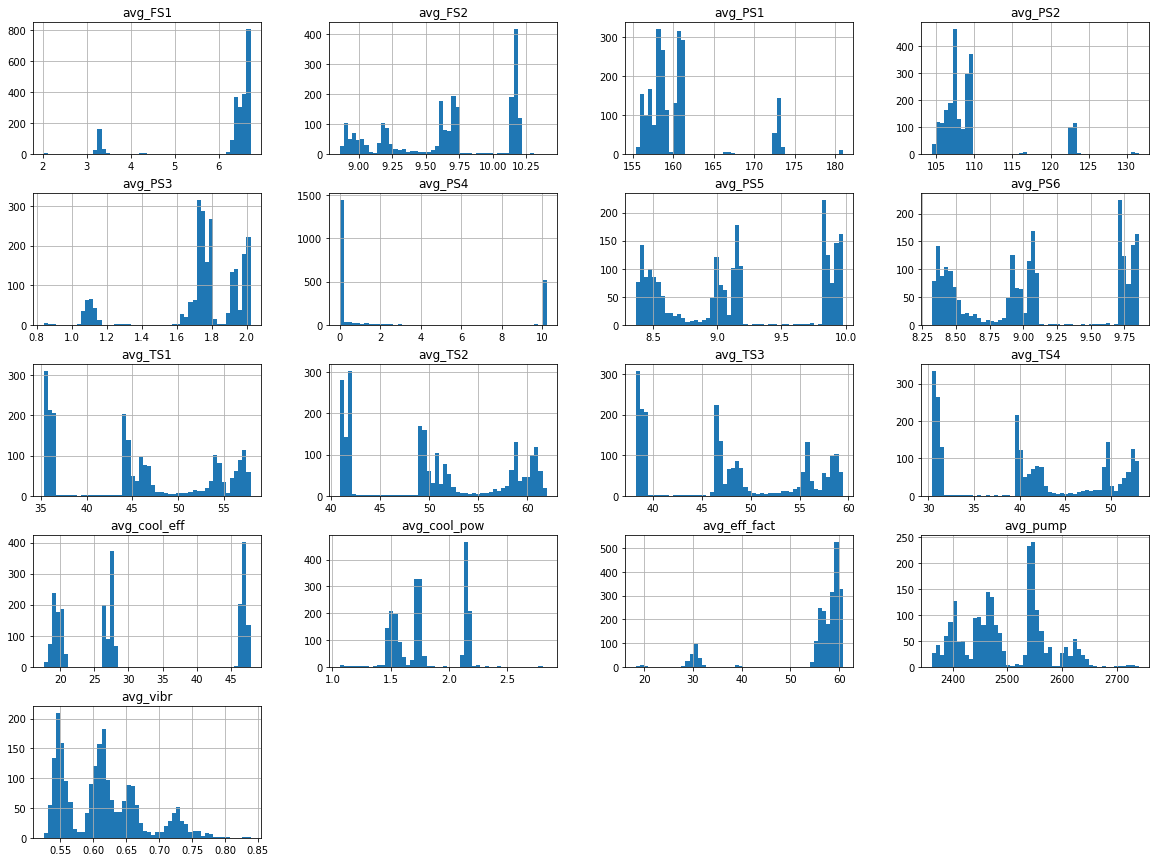

In [13]:
table_avg_val.hist(bins=50, figsize=(20, 15))

### Displaying the correlations between the various parameters in form of a correlation matrix

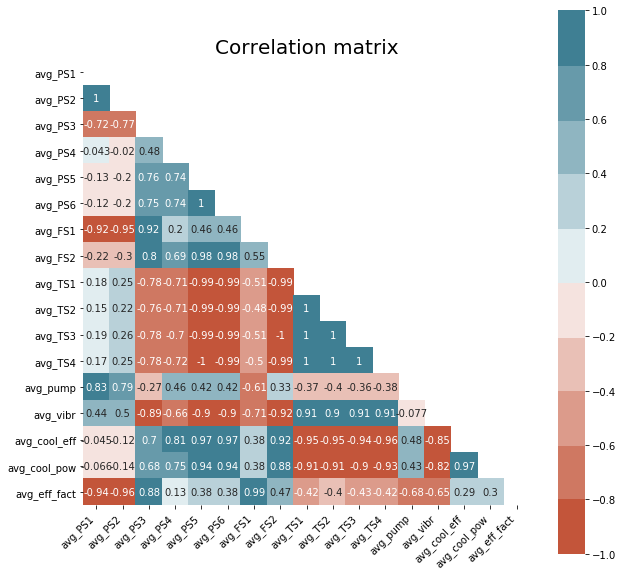

In [24]:
correlation_matrix = table_avg_val.corr()

upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape)).astype(np.bool)

plt.subplots(figsize=(10, 10))

ax = sns.heatmap(correlation_matrix, mask=upper_triangle_mask, vmin=-1, vmax=1, 
                 center=0, cmap=sns.diverging_palette(20, 220, n=10),
                 cbar_kws={"ticks":np.linspace(-1.0, 1.0, 11).tolist()},
                 annot=True, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Correlation matrix", fontsize=20)
plt.show()

### Performing a PCA analysis to further delve into the apparent correlations

Text(0.5, 1.0, 'explained variance vs n components')

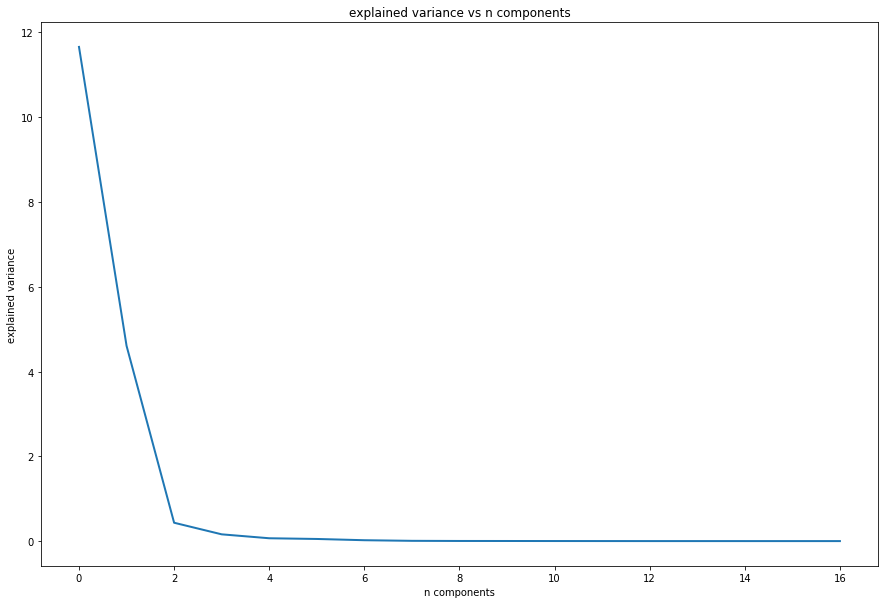

In [15]:
standard_vals = StandardScaler().fit_transform(table_avg_val)
pca = PCA()
pca.fit(standard_vals)
plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n components')
plt.ylabel('explained variance')
plt.title('explained variance vs n components')

### Vi ser at variansen er hovedsakelig forklart av de to første komponentene. Vi tar en titt på hvordan dataene fordeler seg i henhold til de to komponentene.

(2205, 17)
(2205, 2)


Text(0.5, 1.0, 'Clustering of data when PCA dimension = 2')

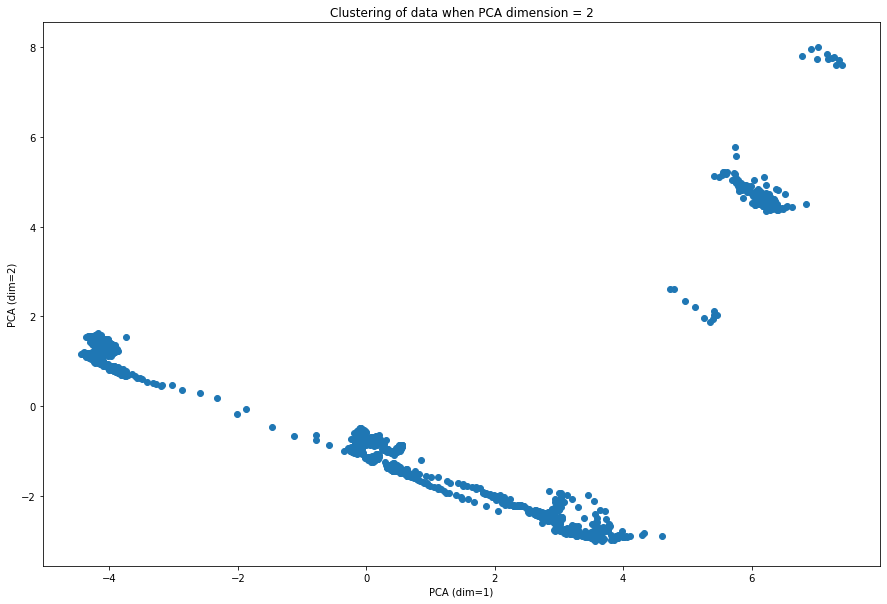

In [16]:
pca_2 = PCA(2)
projected = pca_2.fit_transform(standard_vals)
print(table_avg_val.shape)
print(projected.shape)
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('PCA (dim=1)')
plt.ylabel('PCA (dim=2)')
plt.title('Clustering of data when PCA dimension = 2')

### Making a model that predicts pump values

In [17]:
def predict_pump_values(x, y, predictType):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)
    
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=24)
    
    seed = 24
    xgb1 = xgb.sklearn.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, 
                                    min_child_weight=11, gamma=0.1, subsample=0.8,
                                    colsample_bytree=0.7, objective='multi:softprob',
                                    n_jobs=-1, scale_pos_weight=1, seed=seed)
    xgb1.fit(x_train, y_train)
    
    y_pred = xgb1.predict(x_val)
    
    # confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    
    print(classification_report(y_val, y_pred))
    
    fig, ax = plt.subplots(figsize=(15, 10))
    ind = np.arange(17)
    width = 0.15
    feature_importance = xgb1.feature_importances_
    rect1 = ax.bar(ind + width, feature_importance)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(('PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4',
                       'pump', 'cool_eff', 'cool_pow', 'eff_fact'))
    ax.set_ylabel('Importance')
    ax.set_xlabel('Measurements')
    ax.set_title('Relative importance of various measurements ' + predictType)
    plt.show()

### Lets predict the cooling failure

C:\Users\Bruker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bruker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           3       1.00      1.00      1.00        82
          20       1.00      1.00      1.00        70
         100       1.00      1.00      1.00        69

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



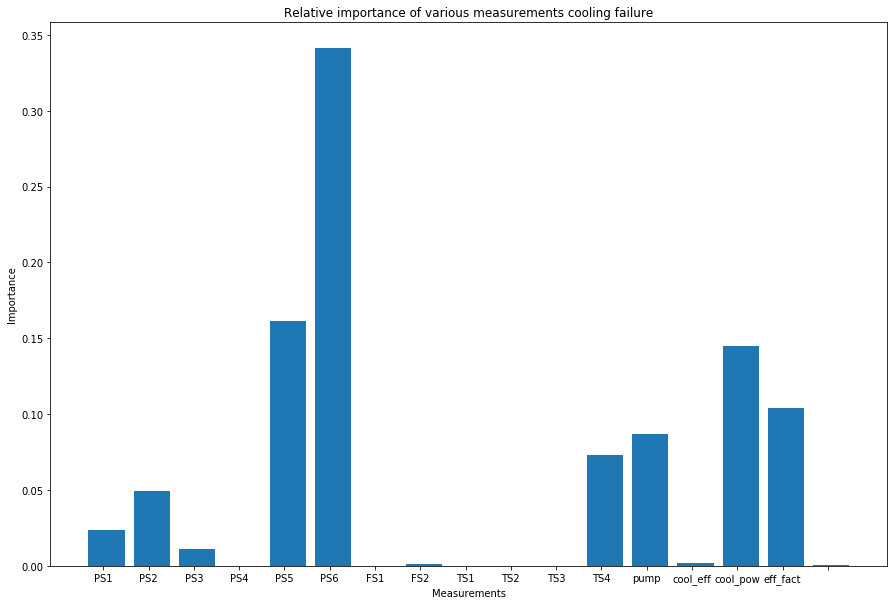

In [18]:
predict_pump_values(standard_vals, y_coolerCondition, 'cooling failure')

### Lets predict the valve condition

              precision    recall  f1-score   support

          73       0.95      0.97      0.96        39
          80       0.97      0.95      0.96        41
          90       0.84      0.84      0.84        31
         100       0.96      0.96      0.96       110

    accuracy                           0.95       221
   macro avg       0.93      0.93      0.93       221
weighted avg       0.95      0.95      0.95       221



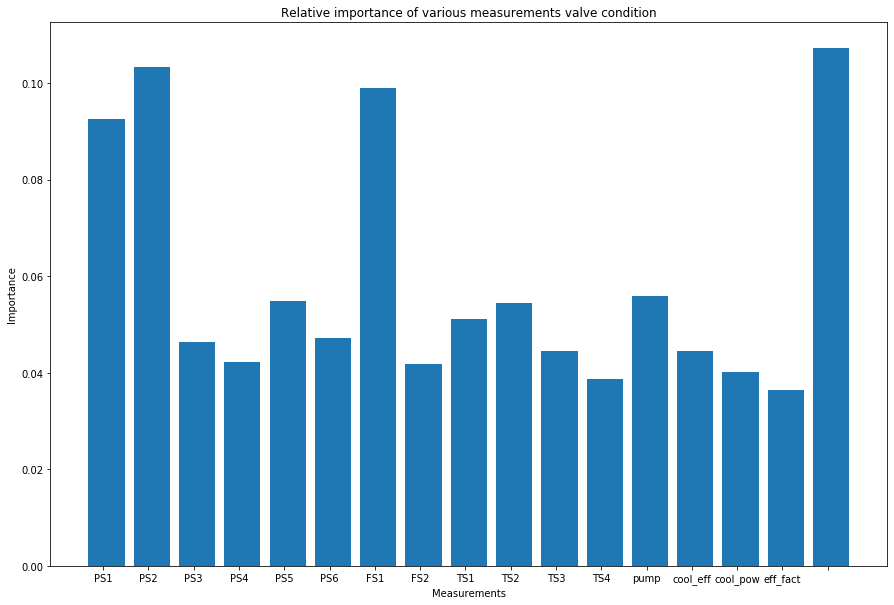

In [21]:
predict_pump_values(standard_vals, y_valveCondition, 'valve condition')

We can see that the valve condition is influenced by all of the conditions, but pressure and volume flow show the most significant relationships with the valve condition

### Lets predict the leak of the pump

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       125
           1       0.96      0.98      0.97        54
           2       0.98      0.98      0.98        42

    accuracy                           0.99       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.99      0.99      0.99       221



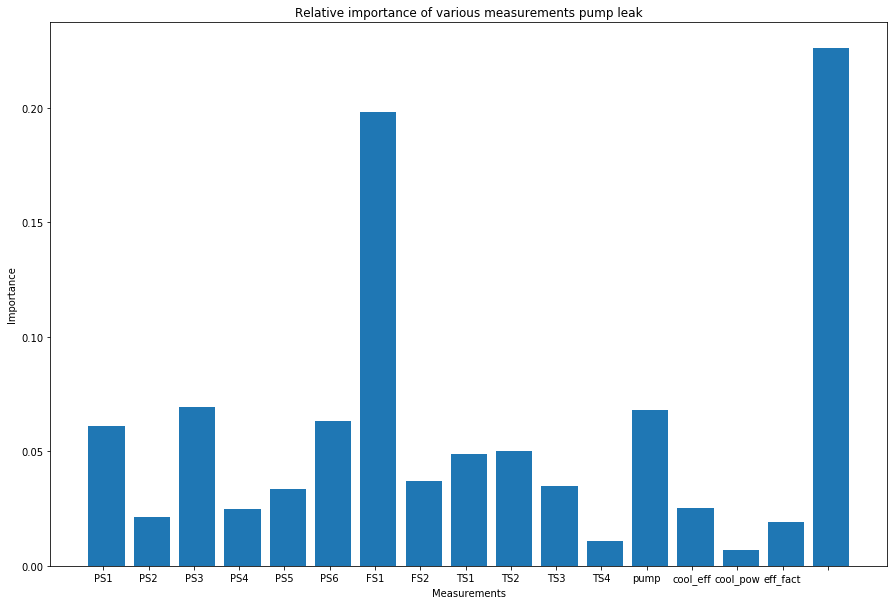

In [20]:
predict_pump_values(standard_vals, y_pumpLeak, 'pump leak')

### Lets predict the hydraulic accumulator condition

              precision    recall  f1-score   support

          90       1.00      0.95      0.97        78
         100       0.92      0.95      0.94        38
         115       0.92      1.00      0.96        36
         130       1.00      1.00      1.00        69

    accuracy                           0.97       221
   macro avg       0.96      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



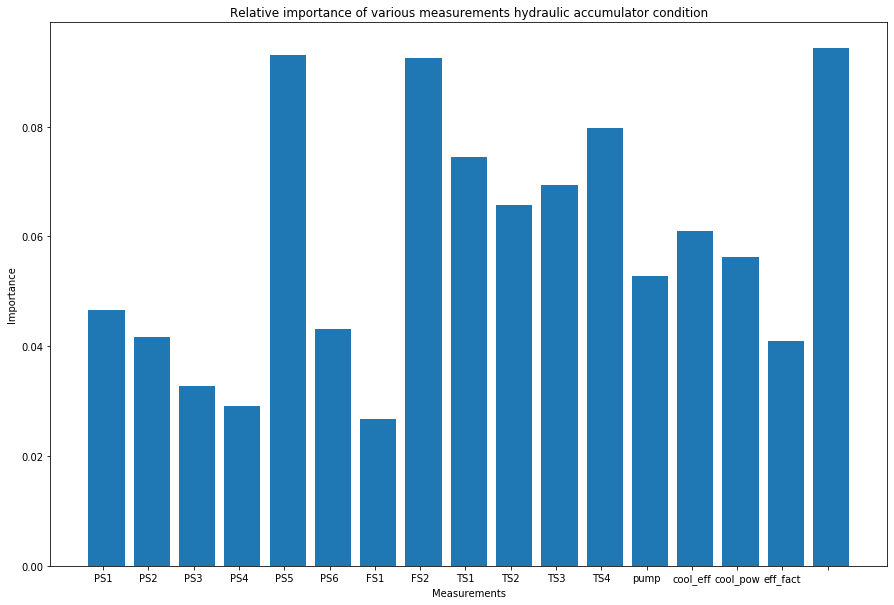

In [22]:
predict_pump_values(standard_vals, y_hydraulicAcc, 'hydraulic accumulator condition')